In [1]:
#step 1: import packages

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime
import seaborn as sns

### Matches DF Cleaning

In [2]:
#step 2: read in WorldCupMatches
matches = pd.read_csv('../data/WorldCupMatches.csv')

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [4]:
matches.shape

(4572, 20)

In [5]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
#Year column to numeric
matches['Year'] = pd.to_numeric(matches['Year'])

In [7]:
#Drop duplicates and NAs
matches = matches.drop_duplicates().dropna()
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [8]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014.0,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL
832,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
833,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
834,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI


In [9]:
matches.shape

(835, 20)

In [10]:
matches['Year'].max()

2014.0

In [11]:
list(np.unique(matches['Home Team Name']))

['Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 "C�te d'Ivoire",
 'Denmark',
 'Ecuador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'IR Iran',
 'Iran',
 'Iraq',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Korea Republic',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'Uruguay',
 'Wales',
 'Yugoslavia',
 'Zaire',
 'rn">Bosnia and Herzegovina',
 'rn">Republic of Ireland',
 'rn">Serbia and Monte

In [12]:
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="C�te d'Ivoire", "Cote d'Ivoire", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="German DR", "Germany", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="Germany FR", "Germany", matches['Home Team Name'])
#matches['Home Team Name'] = np.where(matches['Home Team Name'] =="IR Iran", "Iran", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="IR Iran", "Iran", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="Korea DPR", "North Korea", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =="Korea Republic", "South Korea", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =='rn">Bosnia and Herzegovina', "Bosnia and Herzegovina", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =='rn">Republic of Ireland', "Republic of Ireland", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =='rn">Serbia and Montenegro', "Serbia and Montenegro", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =='rn">Trinidad and Tobago', "Trinidad and Tobago", matches['Home Team Name'])
matches['Home Team Name'] = np.where(matches['Home Team Name'] =='rn">United Arab Emirates', "United Arab Emirated", matches['Home Team Name'])
list(np.unique(matches['Home Team Name']))

['Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Ecuador',
 'England',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iran',
 'Iraq',
 'Italy',
 'Jamaica',
 'Japan',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'North Korea',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Republic of Ireland',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Serbia and Montenegro',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'United Arab Emirated',
 'Uruguay',
 'Wales',
 'Yugoslavia',
 'Zaire

In [13]:
matches.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [14]:
matches['combo']=matches['Home Team Initials'] +'-' + matches['Home Team Name']
list(np.unique(matches['combo']))

['ALG-Algeria',
 'ANG-Angola',
 'ARG-Argentina',
 'AUS-Australia',
 'AUT-Austria',
 'BEL-Belgium',
 'BIH-Bosnia and Herzegovina',
 'BOL-Bolivia',
 'BRA-Brazil',
 'BUL-Bulgaria',
 'CAN-Canada',
 'CHI-Chile',
 'CHN-China PR',
 "CIV-Cote d'Ivoire",
 'CMR-Cameroon',
 'COL-Colombia',
 'CRC-Costa Rica',
 'CRO-Croatia',
 'CUB-Cuba',
 'CZE-Czech Republic',
 'DEN-Denmark',
 'ECU-Ecuador',
 'ENG-England',
 'ESP-Spain',
 'FRA-France',
 'FRG-Germany',
 'GDR-Germany',
 'GER-Germany',
 'GHA-Ghana',
 'GRE-Greece',
 'HAI-Haiti',
 'HON-Honduras',
 'HUN-Hungary',
 'IRL-Republic of Ireland',
 'IRN-Iran',
 'IRQ-Iraq',
 'ITA-Italy',
 'JAM-Jamaica',
 'JPN-Japan',
 'KOR-South Korea',
 'KSA-Saudi Arabia',
 'MAR-Morocco',
 'MEX-Mexico',
 'NED-Netherlands',
 'NGA-Nigeria',
 'NIR-Northern Ireland',
 'NOR-Norway',
 'NZL-New Zealand',
 'PAR-Paraguay',
 'PER-Peru',
 'POL-Poland',
 'POR-Portugal',
 'PRK-North Korea',
 'ROU-Romania',
 'RSA-South Africa',
 'RUS-Russia',
 'SCG-Serbia and Montenegro',
 'SCO-Scotland',
 

In [15]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,combo
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,FRA-France
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,USA-USA
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,YUG-Yugoslavia
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,ROU-Romania
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,ARG-Argentina


In [16]:
list(np.unique(matches['Away Team Name']))

['Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 "C�te d'Ivoire",
 'Denmark',
 'Dutch East Indies',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'IR Iran',
 'Iran',
 'Iraq',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Korea Republic',
 'Kuwait',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'Uruguay',
 'Wales',
 'Yugoslavia',
 'Zaire',
 'rn">Bosni

In [17]:
matches['Away Team Name'] = np.where(matches['Away Team Name'] =="C�te d'Ivoire", "Cote d'Ivoire", matches['Away Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =="German DR", "Germany", matches['Away Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =="Germany FR", "Germany", matches['Away Team Name'])
#matches['Away Team Name'] = np.where(matches['Away Team Name'] =="IR Iran", "Iran", matches['Away Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =="IR Iran", "Iran", matches['Away Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =="Korea DPR", "North Korea", matches['Away Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =="Korea Republic", "South Korea", matches['Away Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =='rn">Bosnia and Herzegovina', "Bosnia and Herzegovina", matches['Away Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =='rn">Republic of Ireland', "Republic of Ireland", matches['Away Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =='rn">Serbia and Montenegro', "Serbia and Montenegro", matches['Away Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =='rn">Trinidad and Tobago', "Trinidad and Tobago", matches['Away Team Name'])
matches['Away Team Name'] = np.where(matches['Away Team Name'] =='rn">United Arab Emirates', "United Arab Emirated", matches['Away Team Name'])
list(np.unique(matches['Away Team Name']))


['Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Dutch East Indies',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iran',
 'Iraq',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kuwait',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'North Korea',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Republic of Ireland',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Serbia and Montenegro',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',

## Export clean data

In [146]:
matches.to_csv('cleaned_matched.csv')

In [18]:
matches['awaycombo']=matches['Away Team Initials'] +'-' + matches['Away Team Name']
list(np.unique(matches['awaycombo']))

['ALG-Algeria',
 'ANG-Angola',
 'ARG-Argentina',
 'AUS-Australia',
 'AUT-Austria',
 'BEL-Belgium',
 'BIH-Bosnia and Herzegovina',
 'BOL-Bolivia',
 'BRA-Brazil',
 'BUL-Bulgaria',
 'CAN-Canada',
 'CHI-Chile',
 'CHN-China PR',
 "CIV-Cote d'Ivoire",
 'CMR-Cameroon',
 'COL-Colombia',
 'CRC-Costa Rica',
 'CRO-Croatia',
 'CUB-Cuba',
 'CZE-Czech Republic',
 'DEN-Denmark',
 'ECU-Ecuador',
 'EGY-Egypt',
 'ENG-England',
 'ESP-Spain',
 'FRA-France',
 'FRG-Germany',
 'GDR-Germany',
 'GER-Germany',
 'GHA-Ghana',
 'GRE-Greece',
 'HAI-Haiti',
 'HON-Honduras',
 'HUN-Hungary',
 'INH-Dutch East Indies',
 'IRL-Republic of Ireland',
 'IRN-Iran',
 'IRQ-Iraq',
 'ISR-Israel',
 'ITA-Italy',
 'JAM-Jamaica',
 'JPN-Japan',
 'KOR-South Korea',
 'KSA-Saudi Arabia',
 'KUW-Kuwait',
 'MAR-Morocco',
 'MEX-Mexico',
 'NED-Netherlands',
 'NGA-Nigeria',
 'NIR-Northern Ireland',
 'NOR-Norway',
 'NZL-New Zealand',
 'PAR-Paraguay',
 'PER-Peru',
 'POL-Poland',
 'POR-Portugal',
 'PRK-North Korea',
 'ROU-Romania',
 'RSA-South Af

### Players DF Cleaning

In [19]:
#step 2: read in WorldCupPlayers
players = pd.read_csv('../data/WorldCupPlayers.csv')

In [20]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [21]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [22]:
players.shape

(37784, 9)

### Cups DF Cleaning

In [23]:
#step 2: read in WorldCups
cups = pd.read_csv('../data/WorldCups.csv')

In [24]:
cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [25]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [26]:
cups.drop_duplicates().dropna()


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [27]:
np.unique(cups['Country'])

array(['Argentina', 'Brazil', 'Chile', 'England', 'France', 'Germany',
       'Italy', 'Korea/Japan', 'Mexico', 'South Africa', 'Spain',
       'Sweden', 'Switzerland', 'USA', 'Uruguay'], dtype=object)

In [28]:
np.unique(cups['Winner'])

array(['Argentina', 'Brazil', 'England', 'France', 'Germany',
       'Germany FR', 'Italy', 'Spain', 'Uruguay'], dtype=object)

In [29]:
cups['Winner'] = np.where(cups['Winner']=='Germany FR', 'Germany', cups['Winner'])

In [30]:
np.unique(cups['Runners-Up'])

array(['Argentina', 'Brazil', 'Czechoslovakia', 'France', 'Germany',
       'Germany FR', 'Hungary', 'Italy', 'Netherlands', 'Sweden'],
      dtype=object)

In [31]:
cups['Runners-Up'] = np.where(cups['Runners-Up']=='Germany FR', 'Germany', cups['Runners-Up'])

In [32]:
np.unique(cups['Third'])

array(['Austria', 'Brazil', 'Chile', 'Croatia', 'France', 'Germany',
       'Germany FR', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Sweden', 'Turkey', 'USA'], dtype=object)

In [33]:
cups['Third'] = np.where(cups['Third']=='Germany FR', 'Germany', cups['Third'])

# ANALYSIS

### Q1.) Was there a specific referee that had the away team advantage?

### Q2.) Which are the top 5 countries who have won the greatest number of FIFA World Cups? Create visuals for the findings.

In [34]:
winners = cups[['Country','Winner']]
winners

,Country,Winner
0,Uruguay,Uruguay
1,Italy,Italy
2,France,Italy
3,Brazil,Uruguay
4,Switzerland,Germany
5,Sweden,Brazil
6,Chile,Brazil
7,England,England
8,Mexico,Brazil
9,Germany,Germany


In [35]:
top5 = winners.value_counts('Winner').head(5).reset_index()
top5

,Winner,count
0,Brazil,5
1,Germany,4
2,Italy,4
3,Argentina,2
4,Uruguay,2


In [36]:
top5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Winner  5 non-null      object
 1   count   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


Text(0.5, 1.0, 'Top 5 World Cup Champions')

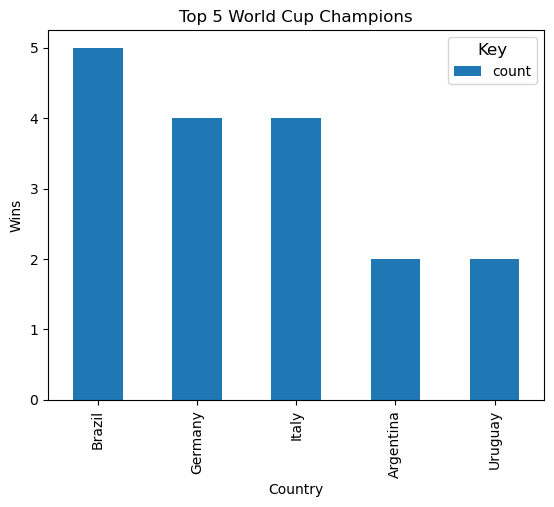

In [37]:
top5.plot.bar(x='Winner',
              y='count')
plt.legend(title='Key', fontsize=10, title_fontsize=12)
plt.xlabel('Country')
plt.ylabel('Wins')
plt.title('Top 5 World Cup Champions') 

### Q3.) How many goals were scored each season? What percentage of total goals were scored by the winning team in each season?

In [38]:
total_goals = cups[['Year','Winner','GoalsScored']]
#rename Columns
total_goals = total_goals.rename(columns={'Year':'Year','Winner':'winning_team','GoalsScored':'Total Goals'})
total_goals

,Year,winning_team,Total Goals
0,1930,Uruguay,70
1,1934,Italy,70
2,1938,Italy,84
3,1950,Uruguay,88
4,1954,Germany,140
5,1958,Brazil,126
6,1962,Brazil,89
7,1966,England,89
8,1970,Brazil,95
9,1974,Germany,97


In [39]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 835
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  835 non-null    float64
 1   Datetime              835 non-null    object 
 2   Stage                 835 non-null    object 
 3   Stadium               835 non-null    object 
 4   City                  835 non-null    object 
 5   Home Team Name        835 non-null    object 
 6   Home Team Goals       835 non-null    float64
 7   Away Team Goals       835 non-null    float64
 8   Away Team Name        835 non-null    object 
 9   Win conditions        835 non-null    object 
 10  Attendance            835 non-null    float64
 11  Half-time Home Goals  835 non-null    float64
 12  Half-time Away Goals  835 non-null    float64
 13  Referee               835 non-null    object 
 14  Assistant 1           835 non-null    object 
 15  Assistant 2           835 no

In [40]:
home_goals = matches[['Year','Home Team Name','Home Team Goals','RoundID','MatchID','Home Team Initials']]
home_goals = home_goals.rename(columns={'Year':'Year','Home Team Name':'home_team','Home Team Goals':'HT_goals', 'Home Team Initials':'HT_initials'})
home_goals
#away_goals = matches[['Year','Away Team Name','Away Team Goals','RoundID','MatchID']]
#away_goals = away_goals.rename(columns={'Year':'Year','Away Team Name':'away_team','Away Team Goals':'AT_goals'})
#goals = home_goals.append(away_goals)
#goals

,Year,home_team,HT_goals,RoundID,MatchID,HT_initials
0,1930.0,France,4.0,201.0,1096.0,FRA
1,1930.0,USA,3.0,201.0,1090.0,USA
2,1930.0,Yugoslavia,2.0,201.0,1093.0,YUG
3,1930.0,Romania,3.0,201.0,1098.0,ROU
4,1930.0,Argentina,1.0,201.0,1085.0,ARG
...,...,...,...,...,...,...
831,2014.0,Argentina,1.0,255953.0,300186504.0,ARG
832,2014.0,Netherlands,2.0,255951.0,300186508.0,NED
833,2014.0,Costa Rica,1.0,255951.0,300186459.0,CRC
834,2014.0,Argentina,1.0,255951.0,300186503.0,ARG


In [41]:
away_goals = matches[['Year','Away Team Name','Away Team Goals','RoundID','MatchID', 'Away Team Initials']]
away_goals = away_goals.rename(columns={'Year':'Year','Away Team Name':'away_team','Away Team Goals':'AT_goals', 'Away Team Initials':'AT_initials'})
away_goals

,Year,away_team,AT_goals,RoundID,MatchID,AT_initials
0,1930.0,Mexico,1.0,201.0,1096.0,MEX
1,1930.0,Belgium,0.0,201.0,1090.0,BEL
2,1930.0,Brazil,1.0,201.0,1093.0,BRA
3,1930.0,Peru,1.0,201.0,1098.0,PER
4,1930.0,France,0.0,201.0,1085.0,FRA
...,...,...,...,...,...,...
831,2014.0,Belgium,0.0,255953.0,300186504.0,BEL
832,2014.0,Mexico,1.0,255951.0,300186508.0,MEX
833,2014.0,Greece,1.0,255951.0,300186459.0,GRE
834,2014.0,Switzerland,0.0,255951.0,300186503.0,SUI


#### Good dataframe to reference back to

In [42]:

goals = matches[['Year','Home Team Name','Home Team Initials','Home Team Goals','Away Team Name','Away Team Initials','Away Team Goals','RoundID','MatchID']]
goals = goals.rename(columns={'Year':'Year','Home Team Name':'home_team','Home Team Goals':'HT_goals', 'Home Team Initials':'HT_initials','Away Team Name':'away_team','Away Team Goals':'AT_goals', 'Away Team Initials':'AT_initials'})
goals

,Year,home_team,HT_initials,HT_goals,away_team,AT_initials,AT_goals,RoundID,MatchID
0,1930.0,France,FRA,4.0,Mexico,MEX,1.0,201.0,1096.0
1,1930.0,USA,USA,3.0,Belgium,BEL,0.0,201.0,1090.0
2,1930.0,Yugoslavia,YUG,2.0,Brazil,BRA,1.0,201.0,1093.0
3,1930.0,Romania,ROU,3.0,Peru,PER,1.0,201.0,1098.0
4,1930.0,Argentina,ARG,1.0,France,FRA,0.0,201.0,1085.0
...,...,...,...,...,...,...,...,...,...
831,2014.0,Argentina,ARG,1.0,Belgium,BEL,0.0,255953.0,300186504.0
832,2014.0,Netherlands,NED,2.0,Mexico,MEX,1.0,255951.0,300186508.0
833,2014.0,Costa Rica,CRC,1.0,Greece,GRE,1.0,255951.0,300186459.0
834,2014.0,Argentina,ARG,1.0,Switzerland,SUI,0.0,255951.0,300186503.0


In [43]:
winning_home_goals = goals.loc[goals['HT_goals']> goals['AT_goals']]
winning_home_goals = winning_home_goals[['Year','home_team','HT_goals']]
winning_home_goals = winning_home_goals.rename(columns={'Year':'Year','home_team':'winning_team','HT_goals':'winning_goals'})
winning_home_goals

,Year,winning_team,winning_goals
0,1930.0,France,4.0
1,1930.0,USA,3.0
2,1930.0,Yugoslavia,2.0
3,1930.0,Romania,3.0
4,1930.0,Argentina,1.0
...,...,...,...
828,2014.0,Germany,1.0
831,2014.0,Argentina,1.0
832,2014.0,Netherlands,2.0
834,2014.0,Argentina,1.0


In [44]:
winning_away_goals = goals.loc[goals['HT_goals']< goals['AT_goals']]
winning_away_goals =winning_away_goals[['Year','away_team','AT_goals']]
winning_away_goals = winning_away_goals.rename(columns={'Year':'Year','away_team':'winning_team','AT_goals':'winning_goals'})
winning_away_goals

,Year,winning_team,winning_goals
103,1958.0,Germany,3.0
235,1974.0,Scotland,2.0
236,1974.0,Netherlands,2.0
240,1974.0,Germany,3.0
246,1974.0,Poland,7.0
...,...,...,...
816,2014.0,Germany,1.0
818,2014.0,Belgium,1.0
825,2014.0,Germany,1.0
826,2014.0,Germany,7.0


In [45]:
#concat dataframes
total_winning_goals = pd.concat([winning_away_goals,winning_home_goals])
total_winning_goals

,Year,winning_team,winning_goals
103,1958.0,Germany,3.0
235,1974.0,Scotland,2.0
236,1974.0,Netherlands,2.0
240,1974.0,Germany,3.0
246,1974.0,Poland,7.0
...,...,...,...
828,2014.0,Germany,1.0
831,2014.0,Argentina,1.0
832,2014.0,Netherlands,2.0
834,2014.0,Argentina,1.0


In [46]:
#USE TO PLOT
total_goals_sum = total_winning_goals.groupby(['Year', 'winning_team']).agg({"winning_goals":"sum"})
total_goals_sum

winning_goals
Year   winning_team               
1930.0 Argentina              16.0
       Brazil                  4.0
       Chile                   4.0
       France                  4.0
       Paraguay                1.0
...                            ...
2014.0 Portugal                2.0
       Spain                   3.0
       Switzerland             5.0
       USA                     2.0
       Uruguay                 3.0

[295 rows x 1 columns]

In [47]:
#merging 2 dataframes together
final_goal_score = pd.merge(total_goals, total_goals_sum, how = 'left', on = ['Year', 'winning_team'])
final_goal_score

,Year,winning_team,Total Goals,winning_goals
0,1930,Uruguay,70,15.0
1,1934,Italy,70,11.0
2,1938,Italy,84,11.0
3,1950,Uruguay,88,13.0
4,1954,Germany,140,22.0
5,1958,Brazil,126,16.0
6,1962,Brazil,89,14.0
7,1966,England,89,11.0
8,1970,Brazil,95,19.0
9,1974,Germany,97,16.0


In [48]:
final_goal_score

,Year,winning_team,Total Goals,winning_goals
0,1930,Uruguay,70,15.0
1,1934,Italy,70,11.0
2,1938,Italy,84,11.0
3,1950,Uruguay,88,13.0
4,1954,Germany,140,22.0
5,1958,Brazil,126,16.0
6,1962,Brazil,89,14.0
7,1966,England,89,11.0
8,1970,Brazil,95,19.0
9,1974,Germany,97,16.0


In [51]:
final_goal_score['Pct Goals by Winning Team']=np.round(final_goal_score['winning_goals']/final_goal_score['Total Goals']*100,2)
final_goal_score = final_goal_score.rename(columns={'winning_goals':'Winning Team Goals'})
final_goal_score

,Year,winning_team,Total Goals,Winning Team Goals,Pct Goals by Winning Team
0,1930,Uruguay,70,15.0,21.43
1,1934,Italy,70,11.0,15.71
2,1938,Italy,84,11.0,13.10
3,1950,Uruguay,88,13.0,14.77
4,1954,Germany,140,22.0,15.71
5,1958,Brazil,126,16.0,12.70
6,1962,Brazil,89,14.0,15.73
7,1966,England,89,11.0,12.36
8,1970,Brazil,95,19.0,20.00
9,1974,Germany,97,16.0,16.49


## EXPORT TO POWER BI For graph

In [144]:
final_goal_score.to_csv("Total_goals.csv")

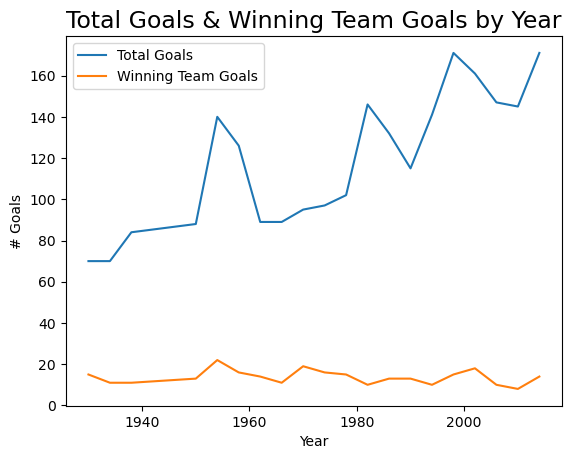

In [52]:
plot2 = final_goal_score[['Year', 'Total Goals', 'Winning Team Goals']].plot.line(x = 'Year')
plot2.set_xlabel('Year')
plot2.set_ylabel('# Goals')
plot2.set_title('Total Goals & Winning Team Goals by Year', fontsize = 17)
plt.show()

In [53]:
tie_goals = winning_away_goals = goals.loc[goals['HT_goals']= goals['AT_goals']]
winning_away_goals

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (1378354509.py, line 1)

### 4.) How many cards (Red/Yellow) were issued in each seaon? Which team was issued the highest number of cards in a season?

In [54]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [55]:
#list(players['Event'].unique())

In [56]:
players['cards'] = players['Event'].str.count('R|Y|RSY')
players


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,cards
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',0.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',0.0
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65',1.0
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN,NaN


In [57]:
players_carded = players[players['cards']>0].groupby(['Team Initials','MatchID','RoundID']).agg({"cards":"sum"}).reset_index()
players_carded = players_carded.rename(columns={'Team Initials':'team carded'})
players_carded


,team carded,MatchID,RoundID,cards
0,ALG,378,308,1.0
1,ALG,379,308,1.0
2,ALG,739,293,1.0
3,ALG,741,293,1.0
4,ALG,300061461,249722,6.0
...,...,...,...,...
1061,YUG,8768,1014,2.0
1062,YUG,8778,1024,3.0
1063,ZAI,1987,262,1.0
1064,ZAI,2176,262,1.0


## Export

In [145]:
players_carded.to_csv("Total_team_cards.csv")

In [58]:
#players_carded['cards'] = players_carded['cards'].astype(str)
#players_carded.info()

In [59]:
#players_carded['team_card']= players['Team Initials'] + '-' + players['cards']
#players_carded

In [60]:
goals

,Year,home_team,HT_initials,HT_goals,away_team,AT_initials,AT_goals,RoundID,MatchID
0,1930.0,France,FRA,4.0,Mexico,MEX,1.0,201.0,1096.0
1,1930.0,USA,USA,3.0,Belgium,BEL,0.0,201.0,1090.0
2,1930.0,Yugoslavia,YUG,2.0,Brazil,BRA,1.0,201.0,1093.0
3,1930.0,Romania,ROU,3.0,Peru,PER,1.0,201.0,1098.0
4,1930.0,Argentina,ARG,1.0,France,FRA,0.0,201.0,1085.0
...,...,...,...,...,...,...,...,...,...
831,2014.0,Argentina,ARG,1.0,Belgium,BEL,0.0,255953.0,300186504.0
832,2014.0,Netherlands,NED,2.0,Mexico,MEX,1.0,255951.0,300186508.0
833,2014.0,Costa Rica,CRC,1.0,Greece,GRE,1.0,255951.0,300186459.0
834,2014.0,Argentina,ARG,1.0,Switzerland,SUI,0.0,255951.0,300186503.0


In [61]:
teams_carded = pd.merge(players_carded, goals, how = 'left', on = ['MatchID', 'RoundID'])
teams_carded

,team carded,MatchID,RoundID,cards,Year,home_team,HT_initials,HT_goals,away_team,AT_initials,AT_goals
0,ALG,378,308,1.0,1986.0,Algeria,ALG,0.0,Spain,ESP,3.0
1,ALG,379,308,1.0,1986.0,Algeria,ALG,1.0,Northern Ireland,NIR,1.0
2,ALG,739,293,1.0,1982.0,Algeria,ALG,0.0,Austria,AUT,2.0
3,ALG,741,293,1.0,1982.0,Germany,FRG,1.0,Algeria,ALG,2.0
4,ALG,300061461,249722,6.0,2010.0,USA,USA,1.0,Algeria,ALG,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1061,YUG,8768,1014,2.0,1998.0,USA,USA,0.0,Yugoslavia,YUG,1.0
1062,YUG,8778,1024,3.0,1998.0,Netherlands,NED,2.0,Yugoslavia,YUG,1.0
1063,ZAI,1987,262,1.0,1974.0,Zaire,ZAI,0.0,Brazil,BRA,3.0
1064,ZAI,2176,262,1.0,1974.0,Zaire,ZAI,0.0,Scotland,SCO,2.0


In [147]:
teams_carded.to_csv("cards_vs_goals.csv")

### USE teams_card_sum for GRAPH

In [69]:
teams_card_sum= teams_carded[['team carded','cards']].groupby('team carded').agg({'cards':'sum'}).reset_index()
teams_card_sum


,team carded,cards
0,ALG,23.0
1,ANG,13.0
2,ARG,130.0
3,AUS,31.0
4,AUT,24.0
...,...,...
74,URS,20.0
75,URU,74.0
76,USA,59.0
77,YUG,30.0


In [65]:
total_winning_teams = total_winning_goals[['Year','winning_team']]
total_winning_teams

,Year,winning_team
103,1958.0,Germany
235,1974.0,Scotland
236,1974.0,Netherlands
240,1974.0,Germany
246,1974.0,Poland
...,...,...
828,2014.0,Germany
831,2014.0,Argentina
832,2014.0,Netherlands
834,2014.0,Argentina


# USE teams_sum_of_wins to graph to compare wins vs number of cards

need help combinging the two sets and macthing abbreviation to country names

In [78]:
teams_sum_of_wins = total_winning_teams['winning_team'].value_counts().reset_index()
teams_sum_of_wins

,winning_team,count
0,Brazil,70
1,Germany,67
2,Italy,45
3,Argentina,42
4,Spain,29
...,...,...
57,North Korea,1
58,Iran,1
59,Tunisia,1
60,Slovakia,1


In [151]:
teams_sum_of_wins.to_csv("wins_vs_cards.csv")

In [150]:
teams_card_sum

,team carded,cards
0,ALG,23.0
1,ANG,13.0
2,ARG,130.0
3,AUS,31.0
4,AUT,24.0
...,...,...
74,URS,20.0
75,URU,74.0
76,USA,59.0
77,YUG,30.0


## Exprot


In [152]:
teams_card_sum.to_csv("extra.csv")

In [80]:
teams_card_sum['team carded'].unique()

array(['ALG', 'ANG', 'ARG', 'AUS', 'AUT', 'BEL', 'BIH', 'BOL', 'BRA',
       'BUL', 'CAN', 'CHI', 'CHN', 'CIV', 'CMR', 'COL', 'CRC', 'CRO',
       'CZE', 'DEN', 'ECU', 'EGY', 'ENG', 'ESP', 'FRA', 'FRG', 'GDR',
       'GER', 'GHA', 'GRE', 'HAI', 'HON', 'HUN', 'IRL', 'IRN', 'IRQ',
       'ISR', 'ITA', 'JAM', 'JPN', 'KOR', 'KSA', 'KUW', 'MAR', 'MEX',
       'NED', 'NGA', 'NIR', 'NOR', 'NZL', 'PAR', 'PER', 'POL', 'POR',
       'PRK', 'ROU', 'RSA', 'RUS', 'SCG', 'SCO', 'SEN', 'SLV', 'SRB',
       'SUI', 'SVK', 'SVN', 'SWE', 'TCH', 'TOG', 'TRI', 'TUN', 'TUR',
       'UAE', 'UKR', 'URS', 'URU', 'USA', 'YUG', 'ZAI'], dtype=object)

In [ ]:
'ALG', 'ANG', 'ARG', 'AUS', 'AUT', 'BEL', 'BIH', 'BOL', 'BRA',
       'BUL', 'CAN', 'CHI', 'CHN', 'CIV', 'CMR', 'COL', 'CRC', 'CRO',
       'CZE', 'DEN', 'ECU', 'EGY', 'ENG', 'ESP', 'FRA', 'FRG', 'GDR',
       'GER', 'GHA', 'GRE', 'HAI', 'HON', 'HUN', 'IRL', 'IRN', 'IRQ',
       'ISR', 'ITA', 'JAM', 'JPN', 'KOR', 'KSA', 'KUW', 'MAR', 'MEX',
       'NED', 'NGA', 'NIR', 'NOR', 'NZL', 'PAR', 'PER', 'POL', 'POR',
       'PRK', 'ROU', 'RSA', 'RUS', 'SCG', 'SCO', 'SEN', 'SLV', 'SRB',
       'SUI', 'SVK', 'SVN', 'SWE', 'TCH', 'TOG', 'TRI', 'TUN', 'TUR',
       'UAE', 'UKR', 'URS', 'URU', 'USA', 'YUG', 'ZAI'

### 5.) How many penalties were taken in each season? What percentage of penalties were successful versus unsuccessful?

In [154]:
players['penalties'] = players['Event'].str.count('P|MP')
players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,cards,pentalties,Pentalties Scored,penalties,Penalties Scored
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,NaN,NaN,NaN,NaN,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,NaN,NaN,NaN,NaN,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',0.0,0.0,0.0,0.0,0.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',0.0,0.0,0.0,0.0,0.0
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65',1.0,0.0,0.0,0.0,0.0
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
players['Penalties Scored'] = players['penalties'] - players['Event'].str.count('MP')
players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,cards,pentalties,Pentalties Scored,penalties,Penalties Scored
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,NaN,NaN,NaN,NaN,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,NaN,NaN,NaN,NaN,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',0.0,0.0,0.0,0.0,0.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',0.0,0.0,0.0,0.0,0.0
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65',1.0,0.0,0.0,0.0,0.0
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
penalties = players[players['penalties']>0].groupby(['RoundID', 'MatchID', 'Team Initials']).agg({"penalties":"sum", "Penalties Scored":"sum"})
penalties

penalties  Penalties Scored
RoundID  MatchID  Team Initials                             
201      1086     MEX                  1.0               1.0
204      1104     FRA                  1.0               1.0
         1111     ESP                  1.0               1.0
206      1150     POL                  1.0               1.0
208      1194     USA                  1.0               1.0
...                                    ...               ...
97410100 97410048 UKR                  1.0               1.0
97410200 97410053 ITA                  1.0               1.0
         97410056 ESP                  1.0               1.0
97410400 97410062 FRA                  1.0               1.0
97410600 97410064 FRA                  1.0               1.0

[175 rows x 2 columns]

In [157]:
goals

,Year,home_team,HT_initials,HT_goals,away_team,AT_initials,AT_goals,RoundID,MatchID
0,1930.0,France,FRA,4.0,Mexico,MEX,1.0,201.0,1096.0
1,1930.0,USA,USA,3.0,Belgium,BEL,0.0,201.0,1090.0
2,1930.0,Yugoslavia,YUG,2.0,Brazil,BRA,1.0,201.0,1093.0
3,1930.0,Romania,ROU,3.0,Peru,PER,1.0,201.0,1098.0
4,1930.0,Argentina,ARG,1.0,France,FRA,0.0,201.0,1085.0
...,...,...,...,...,...,...,...,...,...
831,2014.0,Argentina,ARG,1.0,Belgium,BEL,0.0,255953.0,300186504.0
832,2014.0,Netherlands,NED,2.0,Mexico,MEX,1.0,255951.0,300186508.0
833,2014.0,Costa Rica,CRC,1.0,Greece,GRE,1.0,255951.0,300186459.0
834,2014.0,Argentina,ARG,1.0,Switzerland,SUI,0.0,255951.0,300186503.0


#### merge 2 DF

In [159]:
penalties_scored = pd.merge(goals, penalties, how = 'left', on = ['RoundID', 'MatchID'])
penalties_scored = penalties_scored.dropna()
penalties_scored

,Year,home_team,HT_initials,HT_goals,away_team,AT_initials,AT_goals,RoundID,MatchID,penalties,Penalties Scored
10,1930.0,Argentina,ARG,6.0,Mexico,MEX,3.0,201.0,1086.0,1.0,1.0
18,1934.0,Austria,AUT,3.0,France,FRA,2.0,204.0,1104.0,1.0,1.0
23,1934.0,Spain,ESP,3.0,Brazil,BRA,1.0,204.0,1111.0,1.0,1.0
29,1934.0,Austria,AUT,2.0,Hungary,HUN,1.0,418.0,1106.0,1.0,1.0
40,1938.0,Brazil,BRA,6.0,Poland,POL,5.0,206.0,1150.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
821,2014.0,Japan,JPN,1.0,Colombia,COL,4.0,255931.0,300186457.0,1.0,1.0
822,2014.0,Greece,GRE,2.0,Cote d'Ivoire,CIV,1.0,255931.0,300186455.0,1.0,1.0
834,2014.0,Brazil,BRA,2.0,Colombia,COL,1.0,255953.0,300186461.0,2.0,2.0
837,2014.0,Brazil,BRA,0.0,Netherlands,NED,3.0,255957.0,300186502.0,2.0,2.0


# Graph below

In [160]:
penalties_scored_graph = penalties_scored[['Year','Penalties Scored','penalties']].groupby('Year').agg({'Penalties Scored' :'sum','penalties':'sum'}).reset_index()
penalties_scored_graph = penalties_scored_graph[['Year','Penalties Scored','penalties']]#.groupby('Year').agg({'penalties': 'sum'}).reset_index()
penalties_scored_graph

,Year,Penalties Scored,penalties
0,1930.0,1.0,1.0
1,1934.0,3.0,3.0
2,1938.0,3.0,3.0
3,1950.0,3.0,3.0
4,1954.0,7.0,7.0
5,1958.0,7.0,7.0
6,1962.0,8.0,8.0
7,1966.0,8.0,8.0
8,1970.0,5.0,5.0
9,1974.0,6.0,6.0


In [153]:
penalties_scored_graph.to_csv("penalties_scored.csv")

# Help

AttributeError: 'numpy.float64' object has no attribute 'startswith'

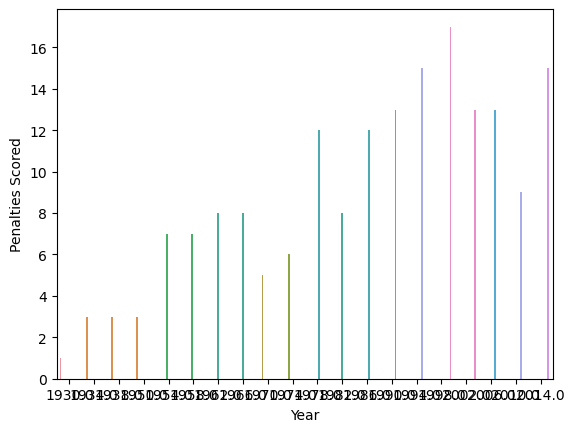

In [143]:
sns.barplot(x = 'Year',
            y = 'Penalties Scored',
            hue = 'penalties' ,
            data = penalties_scored_graph)

In [103]:
#PENALTIES NOT SCORED
unsucessful_p = penalties[penalties['penalties'] != penalties['Penalties Scored']]

penalties  Penalties Scored
RoundID  MatchID   Team Initials                             
249718   300061506 ESP                  1.0               0.0
                   PAR                  1.0               0.0
         300061508 GHA                  1.0               0.0
249722   300061470 GER                  1.0               0.0
         300061474 DEN                  1.0               0.0
         300061494 ESP                  1.0               0.0
255931   300186514 FRA                  1.0               0.0
43950100 43950030  KOR                  1.0               0.0
         43950037  ARG                  1.0               0.0
         43950048  POL                  1.0               0.0
43950200 43950056  KOR                  1.0               0.0